In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [6]:
tmdb_df = pd.read_csv('tmdb.csv')

In [7]:
relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

In [8]:
tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

In [9]:
sid = SentimentIntensityAnalyzer()

In [10]:
def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [11]:
tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)

In [12]:
sentiment_revenue_stats = tmdb_revenue_overview_df.groupby('sentiment')['revenue'].mean()
print(sentiment_revenue_stats)

sentiment
negative    4.106803e+07
neutral     3.277316e+07
positive    3.945085e+07
Name: revenue, dtype: float64


In [13]:
import matplotlib.pyplot as plt

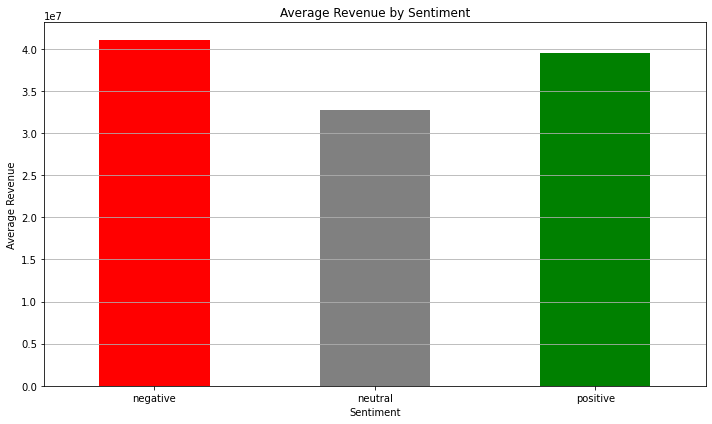

In [14]:
plt.figure(figsize=(10, 6))
sentiment_revenue_stats.plot(kind='bar', color=['red', 'grey', 'green'])
plt.title('Average Revenue by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
total_revenue_by_sentiment = tmdb_revenue_overview_df.groupby('sentiment')['revenue'].sum()
print("Total Revenue by Sentiment:")
print(total_revenue_by_sentiment)
max_sentiment = total_revenue_by_sentiment.idxmax()
min_sentiment = total_revenue_by_sentiment.idxmin()
print("\nSentiment with the highest total revenue:", max_sentiment)
print("Sentiment with the lowest total revenue:", min_sentiment)

Total Revenue by Sentiment:
sentiment
negative    232445025780
neutral      24284915172
positive    175990251923
Name: revenue, dtype: int64

Sentiment with the highest total revenue: negative
Sentiment with the lowest total revenue: neutral


In [16]:
import numpy as np

In [17]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

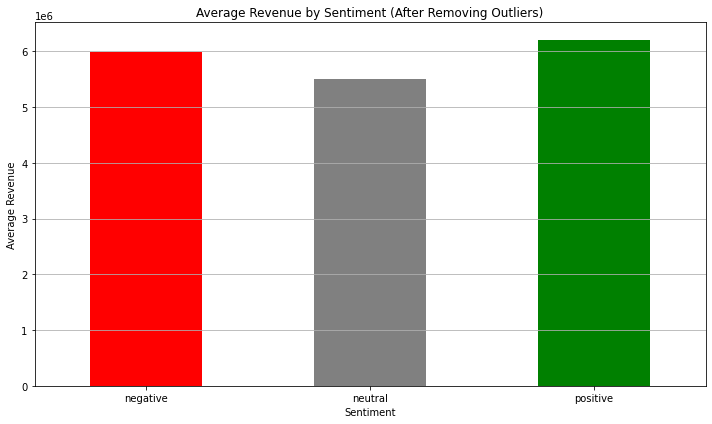


Sentiment with the highest average revenue (after removing outliers): positive
Sentiment with the lowest average revenue (after removing outliers): neutral


In [18]:
tmdb_filtered_df = tmdb_revenue_overview_df.copy()
tmdb_filtered_df['outlier'] = detect_outliers(tmdb_filtered_df['revenue'])

tmdb_filtered_df = tmdb_filtered_df[~tmdb_filtered_df['outlier']]

avg_revenue_by_sentiment = tmdb_filtered_df.groupby('sentiment')['revenue'].mean()

plt.figure(figsize=(10, 6))
avg_revenue_by_sentiment.plot(kind='bar', color=['red', 'grey', 'green'])
plt.title('Average Revenue by Sentiment (After Removing Outliers)')
plt.xlabel('Sentiment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
max_sentiment_avg = avg_revenue_by_sentiment.idxmax()
min_sentiment_avg = avg_revenue_by_sentiment.idxmin()
print("\nSentiment with the highest average revenue (after removing outliers):", max_sentiment_avg)
print("Sentiment with the lowest average revenue (after removing outliers):", min_sentiment_avg)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


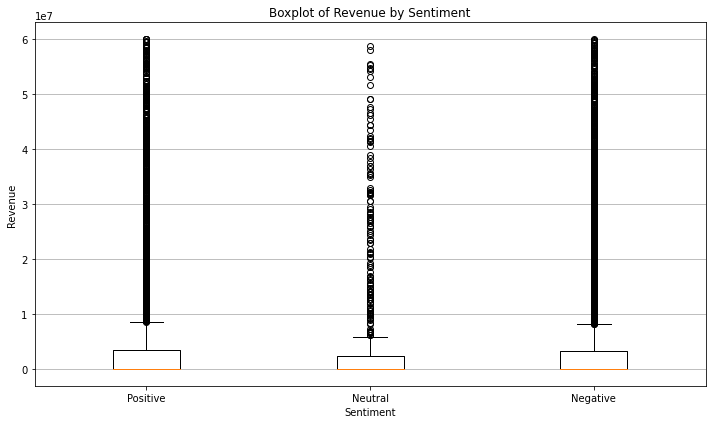

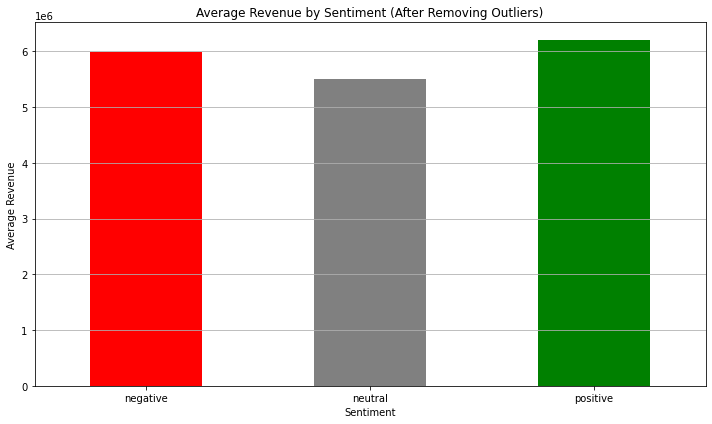


Sentiment with the highest average revenue (after removing outliers): positive
Sentiment with the lowest average revenue (after removing outliers): neutral


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers(data):
    Q1 = np.percentile(data, 25)  
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    outliers = (data < lower_bound) | (data > upper_bound)  
    return outliers

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)

tmdb_filtered_df = tmdb_revenue_overview_df.copy()

tmdb_filtered_df['outlier'] = detect_outliers(tmdb_filtered_df['revenue'])

tmdb_filtered_df = tmdb_filtered_df[~tmdb_filtered_df['outlier']]

avg_revenue_by_sentiment = tmdb_filtered_df.groupby('sentiment')['revenue'].mean()

plt.figure(figsize=(10, 6))
plt.boxplot([tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'positive']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'neutral']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'negative']['revenue']],
            labels=['Positive', 'Neutral', 'Negative'])
plt.title('Boxplot of Revenue by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
avg_revenue_by_sentiment.plot(kind='bar', color=['red', 'grey', 'green'])
plt.title('Average Revenue by Sentiment (After Removing Outliers)')
plt.xlabel('Sentiment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

max_sentiment_avg = avg_revenue_by_sentiment.idxmax()
min_sentiment_avg = avg_revenue_by_sentiment.idxmin()
print("\nSentiment with the highest average revenue (after removing outliers):", max_sentiment_avg)
print("Sentiment with the lowest average revenue (after removing outliers):", min_sentiment_avg)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


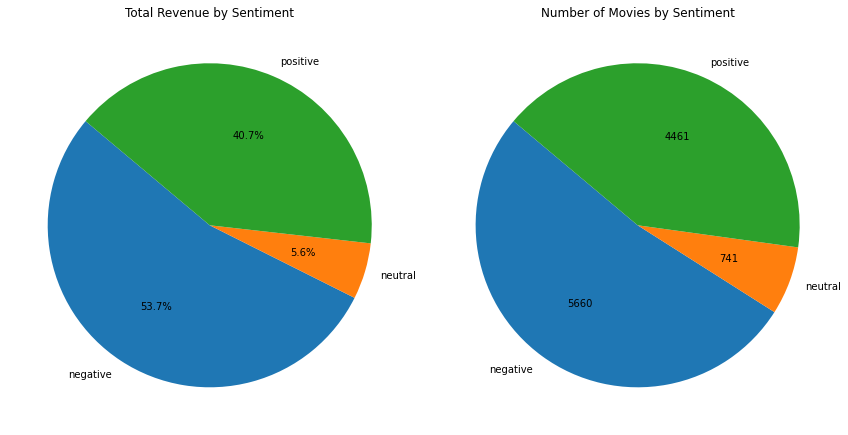

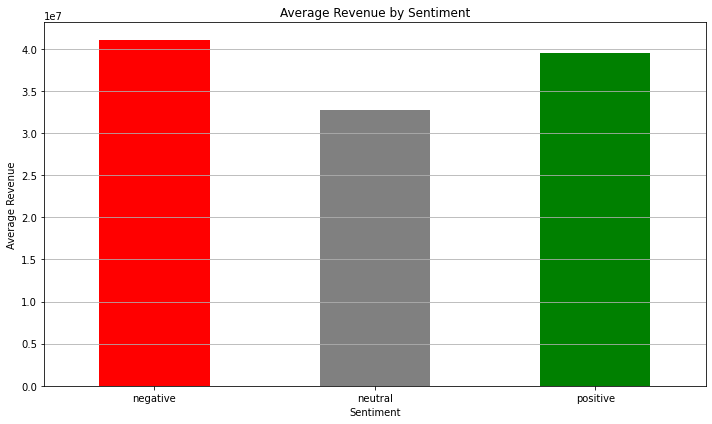


Total Revenue and Number of Movies in Each Sentiment Category:
           total_revenue  num_movies
sentiment                           
negative    232445025780        5660
neutral      24284915172         741
positive    175990251923        4461

Sentiment with the highest average revenue: negative
Sentiment with the lowest average revenue: neutral


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)

sentiment_stats = tmdb_revenue_overview_df.groupby('sentiment').agg({'revenue': 'sum', 'overview': 'count'})
sentiment_stats.columns = ['total_revenue', 'num_movies']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sentiment_stats['total_revenue'], labels=sentiment_stats.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Sentiment')

plt.subplot(1, 2, 2)
plt.pie(sentiment_stats['num_movies'], labels=sentiment_stats.index, autopct=lambda p: '{:.0f}'.format(p * sum(sentiment_stats['num_movies']) / 100),
        startangle=140)
plt.title('Number of Movies by Sentiment')

plt.tight_layout()
plt.show()

avg_revenue_by_sentiment = tmdb_revenue_overview_df.groupby('sentiment')['revenue'].mean()

plt.figure(figsize=(10, 6))
avg_revenue_by_sentiment.plot(kind='bar', color=['red', 'grey', 'green'])
plt.title('Average Revenue by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\nTotal Revenue and Number of Movies in Each Sentiment Category:")
print(sentiment_stats)

max_sentiment_avg = avg_revenue_by_sentiment.idxmax()
min_sentiment_avg = avg_revenue_by_sentiment.idxmin()
print("\nSentiment with the highest average revenue:", max_sentiment_avg)
print("Sentiment with the lowest average revenue:", min_sentiment_avg)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


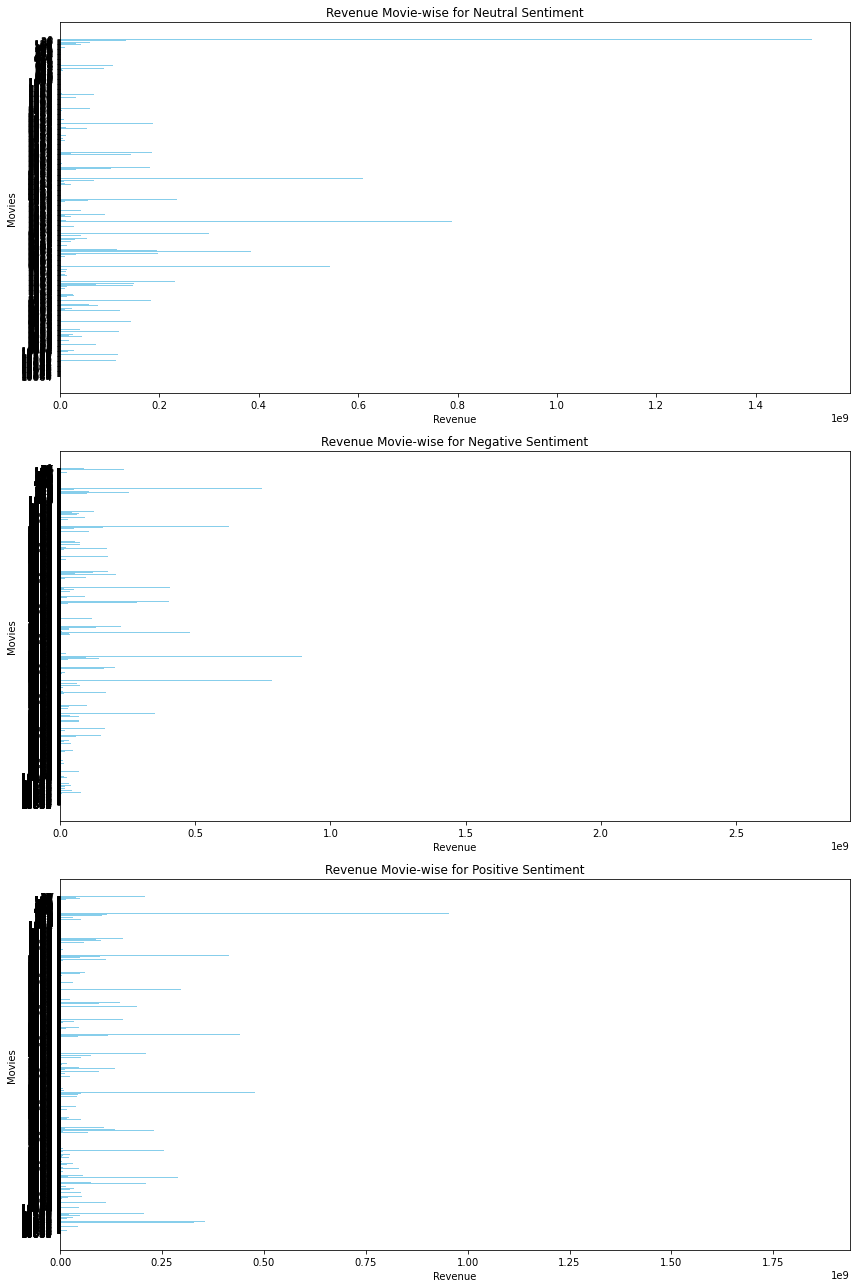

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)

sentiment_categories = tmdb_revenue_overview_df['sentiment'].unique()
num_categories = len(sentiment_categories)

plt.figure(figsize=(12, 6*num_categories))

for i, sentiment in enumerate(sentiment_categories, 1):
    plt.subplot(num_categories, 1, i)
    subset_df = tmdb_revenue_overview_df[tmdb_revenue_overview_df['sentiment'] == sentiment]
    plt.barh(np.arange(len(subset_df)), subset_df['revenue'], color='skyblue')
    plt.xlabel('Revenue')
    plt.ylabel('Movies')
    plt.title(f'Revenue Movie-wise for {sentiment.capitalize()} Sentiment')
    plt.yticks(np.arange(len(subset_df)), subset_df.index)
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


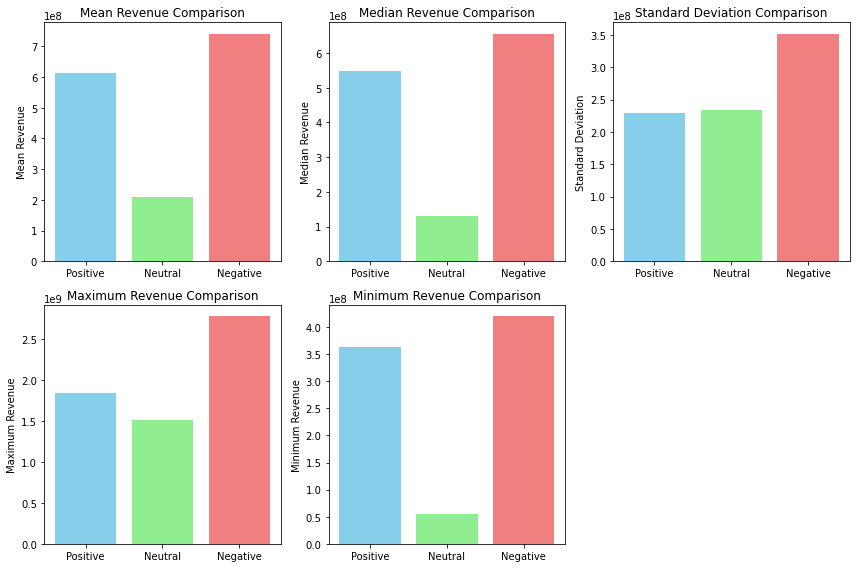

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)
top_100_revenue_positive = tmdb_revenue_overview_df[tmdb_revenue_overview_df['sentiment'] == 'positive'].nlargest(100, 'revenue')
top_100_revenue_neutral = tmdb_revenue_overview_df[tmdb_revenue_overview_df['sentiment'] == 'neutral'].nlargest(100, 'revenue')
top_100_revenue_negative = tmdb_revenue_overview_df[tmdb_revenue_overview_df['sentiment'] == 'negative'].nlargest(100, 'revenue')
positive_stats = top_100_revenue_positive['revenue'].describe()
neutral_stats = top_100_revenue_neutral['revenue'].describe()
negative_stats = top_100_revenue_negative['revenue'].describe()

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.bar(['Positive', 'Neutral', 'Negative'], [positive_stats['mean'], neutral_stats['mean'], negative_stats['mean']], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Mean Revenue Comparison')
plt.ylabel('Mean Revenue')
plt.subplot(2, 3, 2)
plt.bar(['Positive', 'Neutral', 'Negative'], [positive_stats['50%'], neutral_stats['50%'], negative_stats['50%']], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Median Revenue Comparison')
plt.ylabel('Median Revenue')
plt.subplot(2, 3, 3)
plt.bar(['Positive', 'Neutral', 'Negative'], [positive_stats['std'], neutral_stats['std'], negative_stats['std']], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Standard Deviation Comparison')
plt.ylabel('Standard Deviation')
plt.subplot(2, 3, 4)
plt.bar(['Positive', 'Neutral', 'Negative'], [positive_stats['max'], neutral_stats['max'], negative_stats['max']], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Maximum Revenue Comparison')
plt.ylabel('Maximum Revenue')
plt.subplot(2, 3, 5)
plt.bar(['Positive', 'Neutral', 'Negative'], [positive_stats['min'], neutral_stats['min'], negative_stats['min']], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Minimum Revenue Comparison')
plt.ylabel('Minimum Revenue')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


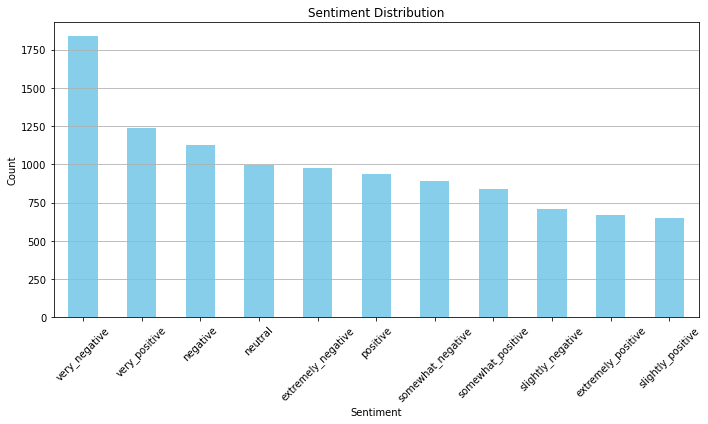

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['overview']
tmdb_overview_df = tmdb_df[relevant_columns].copy()

tmdb_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.9:
        return 'extremely_positive'
    elif 0.7 <= scores['compound'] < 0.9:
        return 'very_positive'
    elif 0.5 <= scores['compound'] < 0.7:
        return 'positive'
    elif 0.3 <= scores['compound'] < 0.5:
        return 'somewhat_positive'
    elif 0.1 <= scores['compound'] < 0.3:
        return 'slightly_positive'
    elif -0.1 < scores['compound'] < 0.1:
        return 'neutral'
    elif -0.3 <= scores['compound'] < -0.1:
        return 'slightly_negative'
    elif -0.5 <= scores['compound'] < -0.3:
        return 'somewhat_negative'
    elif -0.7 <= scores['compound'] < -0.5:
        return 'negative'
    elif -0.9 <= scores['compound'] < -0.7:
        return 'very_negative'
    else:
        return 'extremely_negative'

# Apply sentiment analysis to each overview
tmdb_overview_df['sentiment'] = tmdb_overview_df['overview'].apply(analyze_sentiment)

# Plotting the sentiment distribution
sentiment_counts = tmdb_overview_df['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


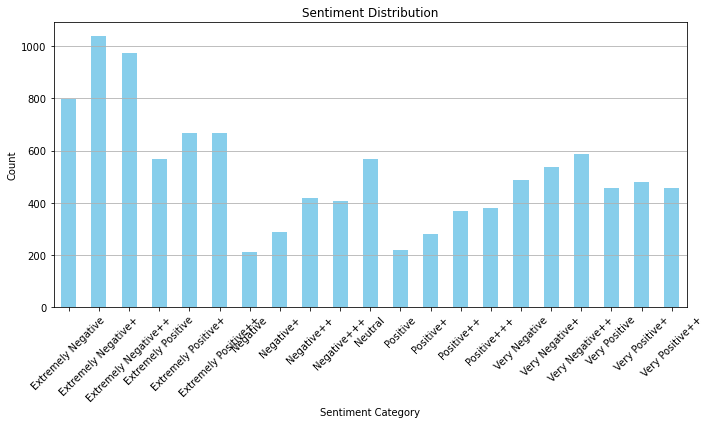

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['overview']
tmdb_overview_df = tmdb_df[relevant_columns].copy()
tmdb_overview_df.dropna(subset=['overview'], inplace=True)
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    sentiment_score = scores['compound']
    if sentiment_score < -0.9:
        return "Extremely Negative++"
    elif -0.9 <= sentiment_score < -0.8:
        return "Extremely Negative+"
    elif -0.8 <= sentiment_score < -0.7:
        return "Extremely Negative"
    elif -0.7 <= sentiment_score < -0.6:
        return "Very Negative++"
    elif -0.6 <= sentiment_score < -0.5:
        return "Very Negative+"
    elif -0.5 <= sentiment_score < -0.4:
        return "Very Negative"
    elif -0.4 <= sentiment_score < -0.3:
        return "Negative+++"
    elif -0.3 <= sentiment_score < -0.2:
        return "Negative++"
    elif -0.2 <= sentiment_score < -0.1:
        return "Negative+"
    elif -0.1 <= sentiment_score < 0:
        return "Negative"
    elif sentiment_score == 0:
        return "Neutral"
    elif 0 < sentiment_score <= 0.1:
        return "Positive"
    elif 0.1 < sentiment_score <= 0.2:
        return "Positive+"
    elif 0.2 < sentiment_score <= 0.3:
        return "Positive++"
    elif 0.3 < sentiment_score <= 0.4:
        return "Positive+++"
    elif 0.4 < sentiment_score <= 0.5:
        return "Very Positive"
    elif 0.5 < sentiment_score <= 0.6:
        return "Very Positive+"
    elif 0.6 < sentiment_score <= 0.7:
        return "Very Positive++"
    elif 0.7 < sentiment_score <= 0.8:
        return "Extremely Positive"
    elif 0.8 < sentiment_score <= 0.9:
        return "Extremely Positive+"
    else:
        return "Extremely Positive++"

tmdb_overview_df['sentiment'] = tmdb_overview_df['overview'].apply(analyze_sentiment)
sentiment_counts = tmdb_overview_df['sentiment'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

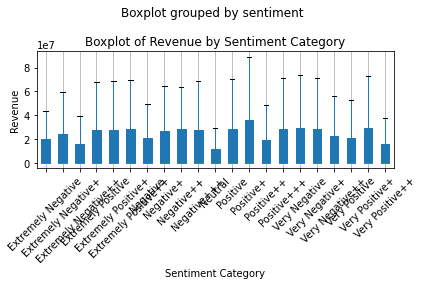

In [6]:
tmdb_df['sentiment'] = tmdb_overview_df['sentiment']

tmdb_df['revenue'] = pd.to_numeric(tmdb_df['revenue'], errors='coerce')

tmdb_df.dropna(subset=['revenue'], inplace=True)

plt.figure(figsize=(15, 10))
tmdb_df.boxplot(column='revenue', by='sentiment', patch_artist=True, showfliers=False)
plt.title('Boxplot of Revenue by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


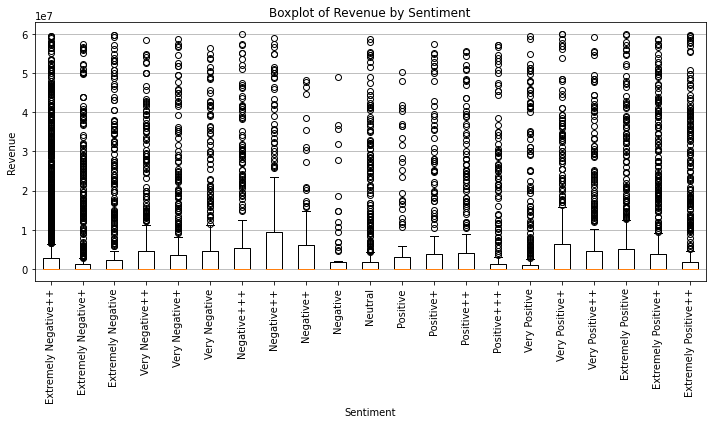

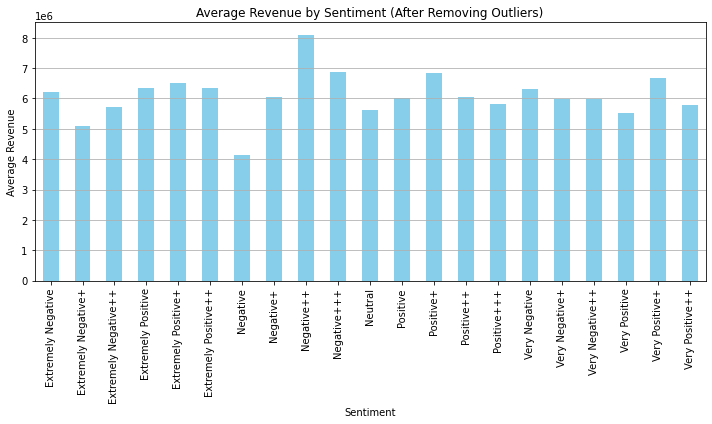


Sentiment with the highest average revenue (after removing outliers): Negative++
Sentiment with the lowest average revenue (after removing outliers): Negative


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers(data):
    Q1 = np.percentile(data, 25)  
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    outliers = (data < lower_bound) | (data > upper_bound)  
    return outliers
tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.9:
        return 'Extremely Positive++'
    elif 0.8 <= scores['compound'] < 0.9:
        return 'Extremely Positive+'
    elif 0.7 <= scores['compound'] < 0.8:
        return 'Extremely Positive'
    elif 0.6 <= scores['compound'] < 0.7:
        return 'Very Positive++'
    elif 0.5 <= scores['compound'] < 0.6:
        return 'Very Positive+'
    elif 0.4 <= scores['compound'] < 0.5:
        return 'Very Positive'
    elif 0.3 <= scores['compound'] < 0.4:
        return 'Positive+++'
    elif 0.2 <= scores['compound'] < 0.3:
        return 'Positive++'
    elif 0.1 <= scores['compound'] < 0.2:
        return 'Positive+'
    elif 0.05 <= scores['compound'] < 0.1:
        return 'Positive'
    elif scores['compound'] == 0:
        return 'Neutral'
    elif -0.05 <= scores['compound'] < 0:
        return 'Negative'
    elif -0.1 <= scores['compound'] < -0.05:
        return 'Negative+'
    elif -0.2 <= scores['compound'] < -0.1:
        return 'Negative++'
    elif -0.3 <= scores['compound'] < -0.2:
        return 'Negative+++'
    elif -0.4 <= scores['compound'] < -0.3:
        return 'Very Negative'
    elif -0.5 <= scores['compound'] < -0.4:
        return 'Very Negative+'
    elif -0.6 <= scores['compound'] < -0.5:
        return 'Very Negative++'
    elif -0.7 <= scores['compound'] < -0.6:
        return 'Extremely Negative'
    elif -0.8 <= scores['compound'] < -0.7:
        return 'Extremely Negative+'
    else:
        return 'Extremely Negative++'
tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)
tmdb_filtered_df = tmdb_revenue_overview_df.copy()
tmdb_filtered_df['outlier'] = detect_outliers(tmdb_filtered_df['revenue'])
tmdb_filtered_df = tmdb_filtered_df[~tmdb_filtered_df['outlier']]
avg_revenue_by_sentiment = tmdb_filtered_df.groupby('sentiment')['revenue'].mean()
plt.figure(figsize=(10, 6))
plt.boxplot([tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Extremely Negative++']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Extremely Negative+']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Extremely Negative']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Very Negative++']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Very Negative+']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Very Negative']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Negative+++']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Negative++']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Negative+']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Negative']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Neutral']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Positive']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Positive+']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Positive++']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Positive+++']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Very Positive']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Very Positive+']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Very Positive++']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Extremely Positive']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Extremely Positive+']['revenue'],
             tmdb_filtered_df[tmdb_filtered_df['sentiment'] == 'Extremely Positive++']['revenue']],
            labels=['Extremely Negative++', 'Extremely Negative+', 'Extremely Negative', 
                    'Very Negative++', 'Very Negative+', 'Very Negative',
                    'Negative+++', 'Negative++', 'Negative+',
                    'Negative', 'Neutral', 'Positive', 'Positive+', 'Positive++', 'Positive+++',
                    'Very Positive', 'Very Positive+', 'Very Positive++',
                    'Extremely Positive', 'Extremely Positive+', 'Extremely Positive++'])
plt.title('Boxplot of Revenue by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
avg_revenue_by_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Sentiment (After Removing Outliers)')
plt.xlabel('Sentiment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

max_sentiment_avg = avg_revenue_by_sentiment.idxmax()
min_sentiment_avg = avg_revenue_by_sentiment.idxmin()
print("\nSentiment with the highest average revenue (after removing outliers):", max_sentiment_avg)
print("Sentiment with the lowest average revenue (after removing outliers):", min_sentiment_avg)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers(data):
    Q1 = np.percentile(data, 25)  
    Q3 = np.percentile(data, 75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    outliers = (data < lower_bound) | (data > upper_bound) 
    return outliers

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.9:
        return 'Extremely Positive++'
    elif 0.8 <= scores['compound'] < 0.9:
        return 'Extremely Positive+'
    elif 0.7 <= scores['compound'] < 0.8:
        return 'Extremely Positive'
    elif 0.6 <= scores['compound'] < 0.7:
        return 'Very Positive++'
    elif 0.5 <= scores['compound'] < 0.6:
        return 'Very Positive+'
    elif 0.4 <= scores['compound'] < 0.5:
        return 'Very Positive'
    elif 0.3 <= scores['compound'] < 0.4:
        return 'Positive+++'
    elif 0.2 <= scores['compound'] < 0.3:
        return 'Positive++'
    elif 0.1 <= scores['compound'] < 0.2:
        return 'Positive+'
    elif 0.05 <= scores['compound'] < 0.1:
        return 'Positive'
    elif scores['compound'] == 0:
        return 'Neutral'
    elif -0.05 <= scores['compound'] < 0:
        return 'Negative'
    elif -0.1 <= scores['compound'] < -0.05:
        return 'Negative+'
    elif -0.2 <= scores['compound'] < -0.1:
        return 'Negative++'
    elif -0.3 <= scores['compound'] < -0.2:
        return 'Negative+++'
    elif -0.4 <= scores['compound'] < -0.3:
        return 'Very Negative'
    elif -0.5 <= scores['compound'] < -0.4:
        return 'Very Negative+'
    elif -0.6 <= scores['compound'] < -0.5:
        return 'Very Negative++'
    elif -0.7 <= scores['compound'] < -0.6:
        return 'Extremely Negative'
    elif -0.8 <= scores['compound'] < -0.7:
        return 'Extremely Negative+'
    else:
        return 'Extremely Negative++'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)

tmdb_filtered_df = tmdb_revenue_overview_df.copy()

tmdb_filtered_df['outlier'] = detect_outliers(tmdb_filtered_df['revenue'])

outliers_count_by_sentiment = tmdb_filtered_df.groupby('sentiment')['outlier'].sum()

outliers_count_by_sentiment = outliers_count_by_sentiment.reindex([
    'Extremely Negative++', 'Extremely Negative+', 'Extremely Negative',
    'Very Negative++', 'Very Negative+', 'Very Negative',
    'Negative+++', 'Negative++', 'Negative+',
    'Negative', 'Neutral', 'Positive', 'Positive+',
    'Positive++', 'Positive+++', 'Very Positive',
    'Very Positive+', 'Very Positive++',
    'Extremely Positive', 'Extremely Positive+', 'Extremely Positive++'
])

print("Number of outliers in each sentiment category (sorted):")
print(outliers_count_by_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of outliers in each sentiment category (sorted):
sentiment
Extremely Negative++    333
Extremely Negative+     129
Extremely Negative       86
Very Negative++          95
Very Negative+           93
Very Negative            68
Negative+++              67
Negative++               41
Negative+                22
Negative                 15
Neutral                  62
Positive                 23
Positive+                54
Positive++               50
Positive+++              68
Very Positive            74
Very Positive+           81
Very Positive++          60
Extremely Positive       94
Extremely Positive+     111
Extremely Positive++    110
Name: outlier, dtype: int64


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers(data):
    Q1 = np.percentile(data, 25) 
    Q3 = np.percentile(data, 75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 
    outliers = (data < lower_bound) | (data > upper_bound)  
    return outliers

tmdb_df = pd.read_csv('tmdb.csv')

relevant_columns = ['revenue', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview) 
    if scores['compound'] >= 0.9:
        return 'Extremely Positive++'
    elif 0.8 <= scores['compound'] < 0.9:
        return 'Extremely Positive+'
    elif 0.7 <= scores['compound'] < 0.8:
        return 'Extremely Positive'
    elif 0.6 <= scores['compound'] < 0.7:
        return 'Very Positive++'
    elif 0.5 <= scores['compound'] < 0.6:
        return 'Very Positive+'
    elif 0.4 <= scores['compound'] < 0.5:
        return 'Very Positive'
    elif 0.3 <= scores['compound'] < 0.4:
        return 'Positive+++'
    elif 0.2 <= scores['compound'] < 0.3:
        return 'Positive++'
    elif 0.1 <= scores['compound'] < 0.2:
        return 'Positive+'
    elif 0.05 <= scores['compound'] < 0.1:
        return 'Positive'
    elif scores['compound'] == 0:
        return 'Neutral'
    elif -0.05 <= scores['compound'] < 0:
        return 'Negative'
    elif -0.1 <= scores['compound'] < -0.05:
        return 'Negative+'
    elif -0.2 <= scores['compound'] < -0.1:
        return 'Negative++'
    elif -0.3 <= scores['compound'] < -0.2:
        return 'Negative+++'
    elif -0.4 <= scores['compound'] < -0.3:
        return 'Very Negative'
    elif -0.5 <= scores['compound'] < -0.4:
        return 'Very Negative+'
    elif -0.6 <= scores['compound'] < -0.5:
        return 'Very Negative++'
    elif -0.7 <= scores['compound'] < -0.6:
        return 'Extremely Negative'
    elif -0.8 <= scores['compound'] < -0.7:
        return 'Extremely Negative+'
    else:
        return 'Extremely Negative++'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)

tmdb_filtered_df = tmdb_revenue_overview_df.copy()

tmdb_filtered_df['outlier'] = detect_outliers(tmdb_filtered_df['revenue'])

sentiment_grouped = tmdb_filtered_df.groupby('sentiment')

report = {
    'Sentiment Category': [],
    'Number of Movies': [],
    'Total Revenue': [],
    'Number of Outliers': [],
    'Outlier Movies Revenue': [],
    'Outlier Revenue Percentage': [],
    'Number of Movies in Range': [],
    'Movies in Range Revenue': [],
    'Movies in Range Revenue Percentage': []
}

for sentiment, group_data in sentiment_grouped:
    num_movies = len(group_data)
    report['Sentiment Category'].append(sentiment)
    report['Number of Movies'].append(num_movies)    
    total_revenue = group_data['revenue'].sum()
    report['Total Revenue'].append(total_revenue)
    
    num_outliers = group_data['outlier'].sum()
    report['Number of Outliers'].append(num_outliers)    
    outlier_movies_revenue = group_data[group_data['outlier']]['revenue'].sum()
    report['Outlier Movies Revenue'].append(outlier_movies_revenue)    
    outlier_revenue_percentage = (outlier_movies_revenue / total_revenue) * 100 if total_revenue != 0 else 0
    report['Outlier Revenue Percentage'].append(outlier_revenue_percentage)    
    movies_in_range = group_data[~group_data['outlier']]
    num_movies_in_range = len(movies_in_range)
    report['Number of Movies in Range'].append(num_movies_in_range)    
    movies_in_range_revenue = movies_in_range['revenue'].sum()
    report['Movies in Range Revenue'].append(movies_in_range_revenue)    
    movies_in_range_revenue_percentage = (movies_in_range_revenue / total_revenue) * 100 if total_revenue != 0 else 0
    report['Movies in Range Revenue Percentage'].append(movies_in_range_revenue_percentage)
sentiment_order = [
    'Extremely Negative++', 'Extremely Negative+', 'Extremely Negative',
    'Very Negative++', 'Very Negative+', 'Very Negative',
    'Negative+++', 'Negative++', 'Negative+',
    'Negative', 'Neutral',
    'Positive', 'Positive+', 'Positive++',
    'Positive+++', 'Very Positive', 'Very Positive+', 'Very Positive++',
    'Extremely Positive', 'Extremely Positive+', 'Extremely Positive++'
]
report_df['Sentiment Category'] = pd.Categorical(report_df['Sentiment Category'], categories=sentiment_order, ordered=True)
sorted_report_df = report_df.sort_values(by='Sentiment Category')
print(sorted_report_df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


      Sentiment Category  Number of Movies  Total Revenue  Number of Outliers  \
2   Extremely Negative++              2100    83105105092                 333   
1    Extremely Negative+               797    33573296874                 129   
0     Extremely Negative               587    23146800000                  86   
17       Very Negative++               539    23011643467                  95   
16        Very Negative+               487    18530571600                  93   
15         Very Negative               406    19365681624                  68   
9            Negative+++               420    19425275706                  67   
8             Negative++               288     9281853267                  41   
7              Negative+               123     6905016059                  22   
6               Negative                87     4380273310                  15   
10               Neutral               567    16004423953                  62   
11              Positive    

In [15]:
tmdb_df['gain']= tmdb_df['revenue'] - tmdb_df ['budget']
tmdb_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gain
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,228436354


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers(data):
    Q1 = np.percentile(data, 25) 
    Q3 = np.percentile(data, 75)  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    outliers = (data < lower_bound) | (data > upper_bound)  
    return outliers

tmdb_df = pd.read_csv('tmdb.csv')
tmdb_df['gain'] = tmdb_df['revenue'] - tmdb_df['budget']
relevant_columns = ['gain', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()
tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.9:
        return 'Extremely Positive++'
    elif 0.8 <= scores['compound'] < 0.9:
        return 'Extremely Positive+'
    elif 0.7 <= scores['compound'] < 0.8:
        return 'Extremely Positive'
    elif 0.6 <= scores['compound'] < 0.7:
        return 'Very Positive++'
    elif 0.5 <= scores['compound'] < 0.6:
        return 'Very Positive+'
    elif 0.4 <= scores['compound'] < 0.5:
        return 'Very Positive'
    elif 0.3 <= scores['compound'] < 0.4:
        return 'Positive+++'
    elif 0.2 <= scores['compound'] < 0.3:
        return 'Positive++'
    elif 0.1 <= scores['compound'] < 0.2:
        return 'Positive+'
    elif 0.05 <= scores['compound'] < 0.1:
        return 'Positive'
    elif scores['compound'] == 0:
        return 'Neutral'
    elif -0.05 <= scores['compound'] < 0:
        return 'Negative'
    elif -0.1 <= scores['compound'] < -0.05:
        return 'Negative+'
    elif -0.2 <= scores['compound'] < -0.1:
        return 'Negative++'
    elif -0.3 <= scores['compound'] < -0.2:
        return 'Negative+++'
    elif -0.4 <= scores['compound'] < -0.3:
        return 'Very Negative'
    elif -0.5 <= scores['compound'] < -0.4:
        return 'Very Negative+'
    elif -0.6 <= scores['compound'] < -0.5:
        return 'Very Negative++'
    elif -0.7 <= scores['compound'] < -0.6:
        return 'Extremely Negative'
    elif -0.8 <= scores['compound'] < -0.7:
        return 'Extremely Negative+'
    else:
        return 'Extremely Negative++'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)

tmdb_filtered_df = tmdb_revenue_overview_df.copy()

tmdb_filtered_df['outlier'] = detect_outliers(tmdb_filtered_df['gain'])

sentiment_grouped = tmdb_filtered_df.groupby('sentiment')

report = {
    'Sentiment Category': [],
    'Number of Movies': [],
    'Total Gain': [],
    'Number of Outliers': [],
    'Outlier Movies Gain': [],
    'Outlier Gain Percentage': [],
    'Number of Movies in Range': [],
    'Movies in Range Gain': [],
    'Movies in Range Gain Percentage': []
}

for sentiment, group_data in sentiment_grouped:
    num_movies = len(group_data)
    report['Sentiment Category'].append(sentiment)
    report['Number of Movies'].append(num_movies)    
    total_gain = group_data['gain'].sum()
    report['Total Gain'].append(total_gain)    
    num_outliers = group_data['outlier'].sum()
    report['Number of Outliers'].append(num_outliers)    
    outlier_movies_gain = group_data[group_data['outlier']]['gain'].sum()
    report['Outlier Movies Gain'].append(outlier_movies_gain)    
    outlier_gain_percentage = (outlier_movies_gain / total_gain) * 100 if total_gain != 0 else 0
    report['Outlier Gain Percentage'].append(outlier_gain_percentage)    
    movies_in_range = group_data[~group_data['outlier']]
    num_movies_in_range = len(movies_in_range)
    report['Number of Movies in Range'].append(num_movies_in_range)    
    movies_in_range_gain = movies_in_range['gain'].sum()
    report['Movies in Range Gain'].append(movies_in_range_gain)    
    movies_in_range_gain_percentage = (movies_in_range_gain / total_gain) * 100 if total_gain != 0 else 0
    report['Movies in Range Gain Percentage'].append(movies_in_range_gain_percentage)
sentiment_order = [
    'Extremely Negative++', 'Extremely Negative+', 'Extremely Negative',
    'Very Negative++', 'Very Negative+', 'Very Negative',
    'Negative+++', 'Negative++', 'Negative+',
    'Negative', 'Neutral',
    'Positive', 'Positive+', 'Positive++',
    'Positive+++', 'Very Positive', 'Very Positive+', 'Very Positive++',
    'Extremely Positive', 'Extremely Positive+', 'Extremely Positive++'
]

report_df = pd.DataFrame(report)
report_df['Sentiment Category'] = pd.Categorical(report_df['Sentiment Category'], categories=sentiment_order, ordered=True)
sorted_report_df = report_df.sort_values(by='Sentiment Category')
print(sorted_report_df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


      Sentiment Category  Number of Movies   Total Gain  Number of Outliers  \
2   Extremely Negative++              2100  52682036890                 533   
1    Extremely Negative+               797  20512271125                 215   
0     Extremely Negative               587  15181147952                 151   
17       Very Negative++               539  15217966536                 145   
16        Very Negative+               487  10468802795                 144   
15         Very Negative               406  12866860527                 103   
9            Negative+++               420  12645497242                 108   
8             Negative++               288   4872855738                  72   
7              Negative+               123   4800027059                  33   
6               Negative                87   2798981185                  21   
10               Neutral               567   9994040814                 127   
11              Positive               134   3849080

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers(data):
    Q1 = np.percentile(data, 25)  
    Q3 = np.percentile(data, 75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    outliers = (data < lower_bound) | (data > upper_bound)  
    return outliers

tmdb_df = pd.read_csv('tmdb.csv')

tmdb_df['gain'] = tmdb_df['revenue'] - tmdb_df['budget']

relevant_columns = ['gain', 'revenue', 'original_title', 'overview']
tmdb_revenue_overview_df = tmdb_df[relevant_columns].copy()

tmdb_revenue_overview_df.dropna(subset=['overview'], inplace=True)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(overview):
    scores = sid.polarity_scores(overview)  
    if scores['compound'] >= 0.9:
        return 'Extremely Positive++'
    elif 0.8 <= scores['compound'] < 0.9:
        return 'Extremely Positive+'
    elif 0.7 <= scores['compound'] < 0.8:
        return 'Extremely Positive'
    elif 0.6 <= scores['compound'] < 0.7:
        return 'Very Positive++'
    elif 0.5 <= scores['compound'] < 0.6:
        return 'Very Positive+'
    elif 0.4 <= scores['compound'] < 0.5:
        return 'Very Positive'
    elif 0.3 <= scores['compound'] < 0.4:
        return 'Positive+++'
    elif 0.2 <= scores['compound'] < 0.3:
        return 'Positive++'
    elif 0.1 <= scores['compound'] < 0.2:
        return 'Positive+'
    elif 0.05 <= scores['compound'] < 0.1:
        return 'Positive'
    elif scores['compound'] == 0:
        return 'Neutral'
    elif -0.05 <= scores['compound'] < 0:
        return 'Negative'
    elif -0.1 <= scores['compound'] < -0.05:
        return 'Negative+'
    elif -0.2 <= scores['compound'] < -0.1:
        return 'Negative++'
    elif -0.3 <= scores['compound'] < -0.2:
        return 'Negative+++'
    elif -0.4 <= scores['compound'] < -0.3:
        return 'Very Negative'
    elif -0.5 <= scores['compound'] < -0.4:
        return 'Very Negative+'
    elif -0.6 <= scores['compound'] < -0.5:
        return 'Very Negative++'
    elif -0.7 <= scores['compound'] < -0.6:
        return 'Extremely Negative'
    elif -0.8 <= scores['compound'] < -0.7:
        return 'Extremely Negative+'
    else:
        return 'Extremely Negative++'

tmdb_revenue_overview_df['sentiment'] = tmdb_revenue_overview_df['overview'].apply(analyze_sentiment)
tmdb_filtered_df = tmdb_revenue_overview_df.copy()
tmdb_filtered_df['outlier'] = detect_outliers(tmdb_filtered_df['gain'])
sentiment_grouped = tmdb_filtered_df.groupby('sentiment')
highest_revenue_movies = {}
lowest_revenue_movies = {}
highest_gain_movies = {}
lowest_gain_movies = {}

for sentiment, group_data in sentiment_grouped:
    highest_revenue_movie = group_data.loc[group_data['revenue'].idxmax()]
    highest_revenue_movies[sentiment] = highest_revenue_movie    
    lowest_revenue_movie = group_data.loc[group_data['revenue'].idxmin()]
    lowest_revenue_movies[sentiment] = lowest_revenue_movie    
    highest_gain_movie = group_data.loc[group_data['gain'].idxmax()]
    highest_gain_movies[sentiment] = highest_gain_movie
    lowest_gain_movie = group_data.loc[group_data['gain'].idxmin()]
    lowest_gain_movies[sentiment] = lowest_gain_movie

print("Highest Revenue Movies:")
for sentiment, movie in highest_revenue_movies.items():
    print(sentiment + ":", movie['original_title'], "(Revenue:", movie['revenue'], ")")
print("\nLowest Revenue Movies:")
for sentiment, movie in lowest_revenue_movies.items():
    print(sentiment + ":", movie['original_title'], "(Revenue:", movie['revenue'], ")")
print("\nHighest Gain Movies:")
for sentiment, movie in highest_gain_movies.items():
    print(sentiment + ":", movie['original_title'], "(Gain:", movie['gain'], ")")
print("\nLowest Gain Movies:")
for sentiment, movie in lowest_gain_movies.items():
    print(sentiment + ":", movie['original_title'], "(Gain:", movie['gain'], ")")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Highest Revenue Movies:
Extremely Negative: The Avengers (Revenue: 1519557910 )
Extremely Negative+: Iron Man 3 (Revenue: 1215439994 )
Extremely Negative++: Star Wars: The Force Awakens (Revenue: 2068178225 )
Extremely Positive: Harry Potter and the Philosopher's Stone (Revenue: 976475550 )
Extremely Positive+: Titanic (Revenue: 1845034188 )
Extremely Positive++: Frozen (Revenue: 1274219009 )
Negative: Shrek the Third (Revenue: 798958165 )
Negative+: Skyfall (Revenue: 1108561013 )
Negative++: Teenage Mutant Ninja Turtles (Revenue: 477200000 )
Negative+++: The Lord of the Rings: The Return of the King (Revenue: 1118888979 )
Neutral: Jurassic World (Revenue: 1513528810 )
Positive: The Lord of the Rings: The Two Towers (Revenue: 926287400 )
Positive+: Toy Story 3 (Revenue: 1063171911 )
Positive++: The Hobbit: The Battle of the Five Armies (Revenue: 955119788 )
Positive+++: Inside Out (Revenue: 853708609 )
Very Negative: Avatar (Revenue: 2781505847 )
Very Negative+: The Lion King (Revenue:

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


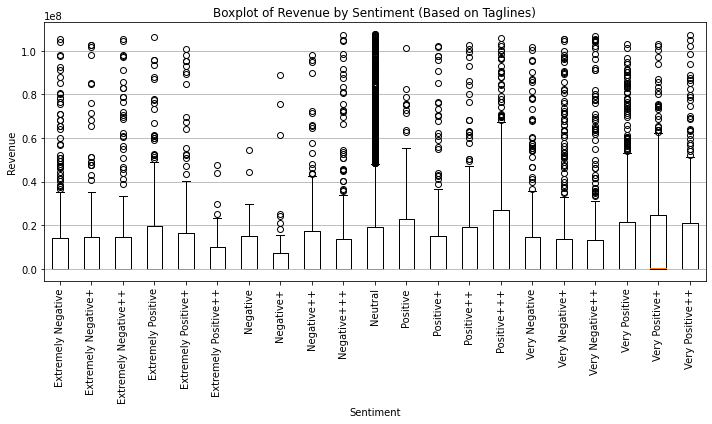

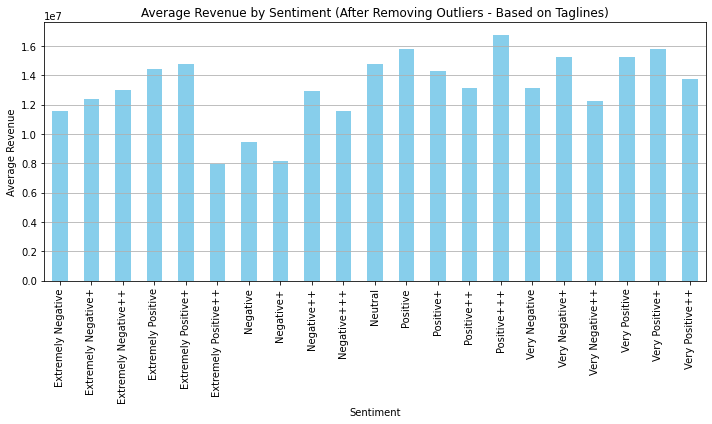


Sentiment with the highest average revenue (after removing outliers - based on taglines): Positive+++
Sentiment with the lowest average revenue (after removing outliers - based on taglines): Extremely Positive++
Number of movies in each sentiment category:
sentiment
Neutral                 2478
Very Positive            490
Very Negative++          382
Positive+++              369
Extremely Negative       346
Very Positive++          334
Very Positive+           322
Very Negative+           299
Negative+++              264
Positive++               231
Very Negative            225
Extremely Positive       212
Extremely Negative++     203
Extremely Negative+      167
Positive+                157
Negative++               147
Extremely Positive+      128
Positive                  77
Negative+                 50
Extremely Positive++      27
Negative                  23
Name: count, dtype: int64


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def detect_outliers(data):
    Q1 = np.percentile(data, 25) 
    Q3 = np.percentile(data, 75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR  
    outliers = (data < lower_bound) | (data > upper_bound)  
    return outliers

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = sid.polarity_scores(text)  
    if scores['compound'] >= 0.9:
        return 'Extremely Positive++'
    elif 0.8 <= scores['compound'] < 0.9:
        return 'Extremely Positive+'
    elif 0.7 <= scores['compound'] < 0.8:
        return 'Extremely Positive'
    elif 0.6 <= scores['compound'] < 0.7:
        return 'Very Positive++'
    elif 0.5 <= scores['compound'] < 0.6:
        return 'Very Positive+'
    elif 0.4 <= scores['compound'] < 0.5:
        return 'Very Positive'
    elif 0.3 <= scores['compound'] < 0.4:
        return 'Positive+++'
    elif 0.2 <= scores['compound'] < 0.3:
        return 'Positive++'
    elif 0.1 <= scores['compound'] < 0.2:
        return 'Positive+'
    elif 0.05 <= scores['compound'] < 0.1:
        return 'Positive'
    elif scores['compound'] == 0:
        return 'Neutral'
    elif -0.05 <= scores['compound'] < 0:
        return 'Negative'
    elif -0.1 <= scores['compound'] < -0.05:
        return 'Negative+'
    elif -0.2 <= scores['compound'] < -0.1:
        return 'Negative++'
    elif -0.3 <= scores['compound'] < -0.2:
        return 'Negative+++'
    elif -0.4 <= scores['compound'] < -0.3:
        return 'Very Negative'
    elif -0.5 <= scores['compound'] < -0.4:
        return 'Very Negative+'
    elif -0.6 <= scores['compound'] < -0.5:
        return 'Very Negative++'
    elif -0.7 <= scores['compound'] < -0.6:
        return 'Extremely Negative'
    elif -0.8 <= scores['compound'] < -0.7:
        return 'Extremely Negative+'
    else:
        return 'Extremely Negative++'

tmdb_df = pd.read_csv('tmdb.csv')
relevant_columns = ['revenue', 'tagline']
tmdb_revenue_tagline_df = tmdb_df[relevant_columns].copy()
tmdb_revenue_tagline_df.dropna(subset=['tagline'], inplace=True)
tmdb_revenue_tagline_df['sentiment'] = tmdb_revenue_tagline_df['tagline'].apply(analyze_sentiment)
tmdb_filtered_tagline_df = tmdb_revenue_tagline_df.copy()

tmdb_filtered_tagline_df['outlier'] = detect_outliers(tmdb_filtered_tagline_df['revenue'])
tmdb_filtered_tagline_df = tmdb_filtered_tagline_df[~tmdb_filtered_tagline_df['outlier']]

avg_revenue_by_sentiment_tagline = tmdb_filtered_tagline_df.groupby('sentiment')['revenue'].mean()
plt.figure(figsize=(10, 6))
plt.boxplot([tmdb_filtered_tagline_df[tmdb_filtered_tagline_df['sentiment'] == sentiment]['revenue']
             for sentiment in avg_revenue_by_sentiment_tagline.index],
            labels=avg_revenue_by_sentiment_tagline.index)
plt.title('Boxplot of Revenue by Sentiment (Based on Taglines)')
plt.xlabel('Sentiment')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
avg_revenue_by_sentiment_tagline.plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Sentiment (After Removing Outliers - Based on Taglines)')
plt.xlabel('Sentiment')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
max_sentiment_avg_tagline = avg_revenue_by_sentiment_tagline.idxmax()
min_sentiment_avg_tagline = avg_revenue_by_sentiment_tagline.idxmin()
print("\nSentiment with the highest average revenue (after removing outliers - based on taglines):", max_sentiment_avg_tagline)
print("Sentiment with the lowest average revenue (after removing outliers - based on taglines):", min_sentiment_avg_tagline)
movie_counts_by_sentiment = tmdb_filtered_tagline_df['sentiment'].value_counts()
print("Number of movies in each sentiment category:")
print(movie_counts_by_sentiment)